### **CHURN PREDICTION**

In [1]:
#Importation of required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score




In [6]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv")

In [7]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6974,0422-UXFAP,Female,0,Yes,No,51,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,98.85,4947.55,No
6302,9250-WYPLL,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.55,413.65,Yes
4889,9746-MDMBK,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.45,5317.8,No
6240,6521-YYTYI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.30,93.3,Yes
433,2957-LOLHO,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.9,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**DATA PREPROCESSING**

In [9]:
#check to see null columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since none of the columns have null rows, we dont have to impute or drop any columns

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#Next we drop "customerID" that because it is not relevant to our model
df.drop("customerID",axis=1, inplace=True)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#Next we convert total charges to numeric
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
pd.to_numeric(df.TotalCharges,errors="coerce")
#it means that if pandas encounters any values that cannot be converted to numeric,
# it will set them as NaN (Not a Number)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
#Since these rows have null values(blank), I dropped them
blank_rows = df[df['TotalCharges'] == " "]

In [17]:
# Drop rows with blank values
df= df.drop(blank_rows.index, axis=0)


In [18]:
df.shape

(7032, 20)

In [19]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [21]:
df.TotalCharges.dtypes

dtype('float64')

In [23]:
#Finding unique values

In [24]:
for col in df:
    unique_values = df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values. They are {df[col].unique()}" )



Column 'gender' has 2 unique values. They are ['Female' 'Male']
Column 'SeniorCitizen' has 2 unique values. They are [0 1]
Column 'Partner' has 2 unique values. They are ['Yes' 'No']
Column 'Dependents' has 2 unique values. They are ['No' 'Yes']
Column 'tenure' has 72 unique values. They are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column 'PhoneService' has 2 unique values. They are ['No' 'Yes']
Column 'MultipleLines' has 3 unique values. They are ['No phone service' 'No' 'Yes']
Column 'InternetService' has 3 unique values. They are ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' has 3 unique values. They are ['No' 'Yes' 'No internet service']
Column 'OnlineBackup' has 3 unique values. They are ['Yes' 'No' 'No internet service']
Column 'DeviceProtection' has 3 unique values. They are ['No' 'Yes' 'No interne

In [25]:
categorical_columns = df.select_dtypes(include=['object'])

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in 'Churn': ['No' 'Ye

In [26]:
df.replace('No phone service',"No" ,inplace=True)
df.replace('No internet service',"No" ,inplace=True)
#I am simplifying the categories related to phone and internet services to a
#single value, 'No', for easier analysis or interpretation. This is done because
# there are variations of the same meaning in the categorical variables."

In [27]:
categorical_columns = df.select_dtypes(include=['object'])

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes']
Unique values in 'OnlineBackup': ['Yes' 'No']
Unique values in 'DeviceProtection': ['No' 'Yes']
Unique values in 'TechSupport': ['No' 'Yes']
Unique values in 'StreamingTV': ['No' 'Yes']
Unique values in 'StreamingMovies': ['No' 'Yes']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in 'Churn': ['No' 'Yes']


In [28]:
#Label encoding
# List of categorical columns
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Encode categorical columns
for col in categorical_columns:
    df[col], _ = pd.factorize(df[col])

# Display the unique values after encoding
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")



Unique values in 'gender': [0 1]
Unique values in 'Partner': [0 1]
Unique values in 'Dependents': [0 1]
Unique values in 'PhoneService': [0 1]
Unique values in 'MultipleLines': [0 1]
Unique values in 'InternetService': [0 1 2]
Unique values in 'OnlineSecurity': [0 1]
Unique values in 'OnlineBackup': [0 1]
Unique values in 'DeviceProtection': [0 1]
Unique values in 'TechSupport': [0 1]
Unique values in 'StreamingTV': [0 1]
Unique values in 'StreamingMovies': [0 1]
Unique values in 'Contract': [0 1 2]
Unique values in 'PaperlessBilling': [0 1]
Unique values in 'PaymentMethod': [0 1 2 3]
Unique values in 'Churn': [0 1]


In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,0,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,0,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [30]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,0,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,0,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [32]:
X= df.drop("Churn",axis=1)
y=df["Churn"]

In [33]:
model = RandomForestClassifier()
model.fit(X, y)

# Display feature importances with column names
feature_importances = model.feature_importances_
columns = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)



             Feature  Importance
18      TotalCharges    0.197223
17    MonthlyCharges    0.192778
4             tenure    0.163741
14          Contract    0.085735
16     PaymentMethod    0.065045
7    InternetService    0.036447
0             gender    0.027841
15  PaperlessBilling    0.026294
2            Partner    0.022694
8     OnlineSecurity    0.022295
1      SeniorCitizen    0.021124
9       OnlineBackup    0.020730
11       TechSupport    0.020519
6      MultipleLines    0.019345
3         Dependents    0.019016
10  DeviceProtection    0.018946
13   StreamingMovies    0.017399
12       StreamingTV    0.016005
5       PhoneService    0.006821


In [34]:
#drop irrelevant features
# Columns to drop based on feature importances as their contribution to the model's predictive power was relatively weak.
columns_to_drop = [
    'OnlineSecurity', 'Partner', 'TechSupport', 'SeniorCitizen',
    'OnlineBackup', 'Dependents', 'MultipleLines', 'DeviceProtection',
    'StreamingTV', 'StreamingMovies', 'PhoneService', "PaperlessBilling"
]

# Drop the specified columns
X_filtered = X.drop(columns=columns_to_drop)


In [35]:
X_filtered.head()

,gender,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,0,29.85,29.85
1,1,34,0,1,1,56.95,1889.50
2,1,2,0,0,1,53.85,108.15
3,1,45,0,1,2,42.30,1840.75
4,0,2,1,0,0,70.70,151.65


In [36]:
df = pd.concat([X_filtered, y], axis=1)

In [37]:
df.head()

,gender,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,29.85,29.85,0
1,1,34,0,1,1,56.95,1889.50,0
2,1,2,0,0,1,53.85,108.15,1
3,1,45,0,1,2,42.30,1840.75,0
4,0,2,1,0,0,70.70,151.65,1


**EDA**

Graphical EDA

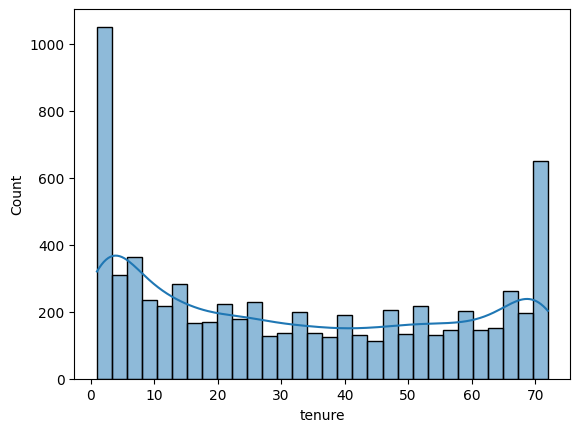

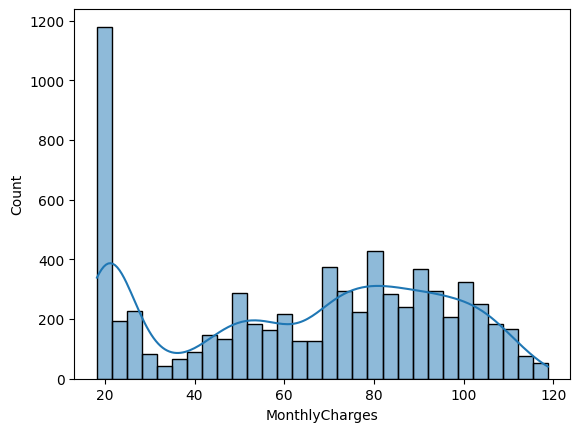

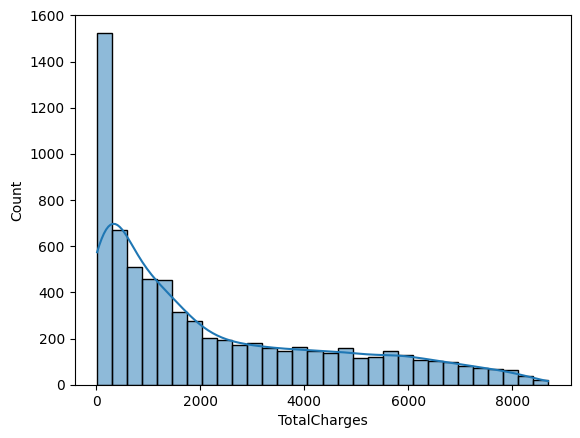

In [38]:
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.show()

sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.show()

sns.histplot(data=df, x='TotalCharges', bins=30, kde=True)
plt.show()
#These histograms show how the values are spread across different ranges


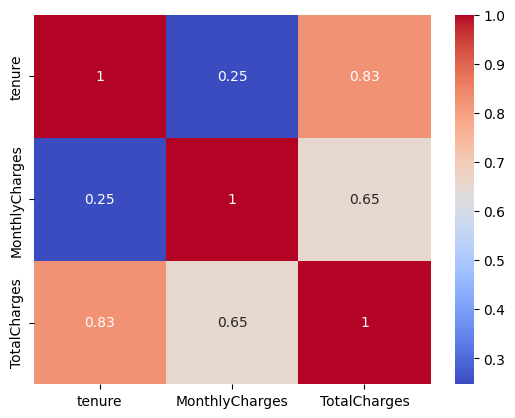

In [39]:
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
#This correlation heatmap is a valuable visualization in EDA for understanding relationships between numerical variable

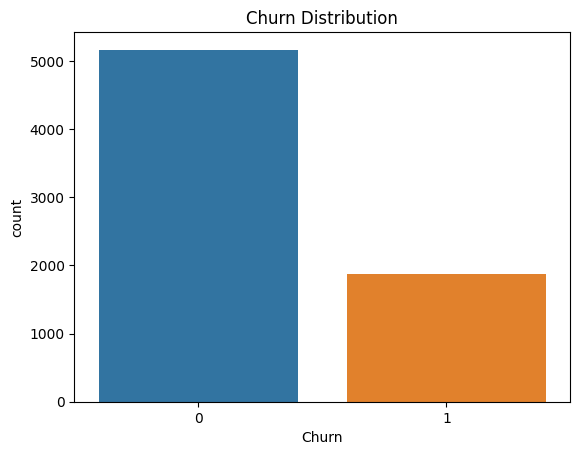

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


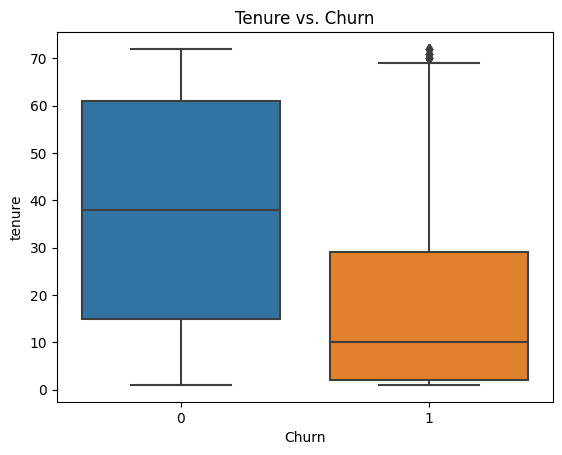

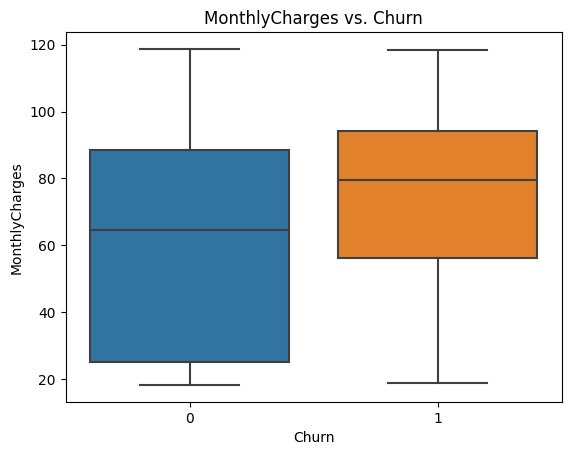

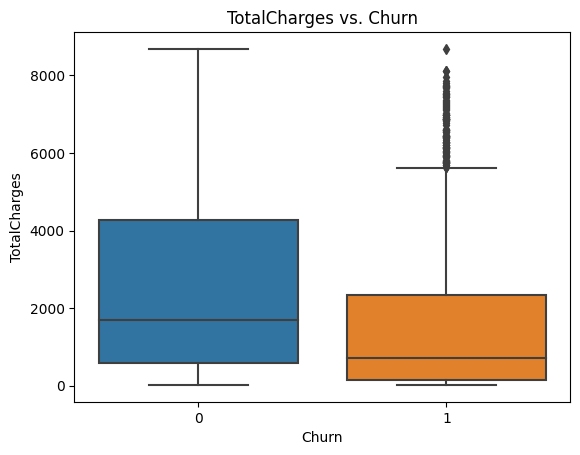

In [41]:
# Numeric features: tenure, MonthlyCharges, TotalCharges

sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs. Churn')
plt.show()

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges vs. Churn')
plt.show()

sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('TotalCharges vs. Churn')
plt.show()


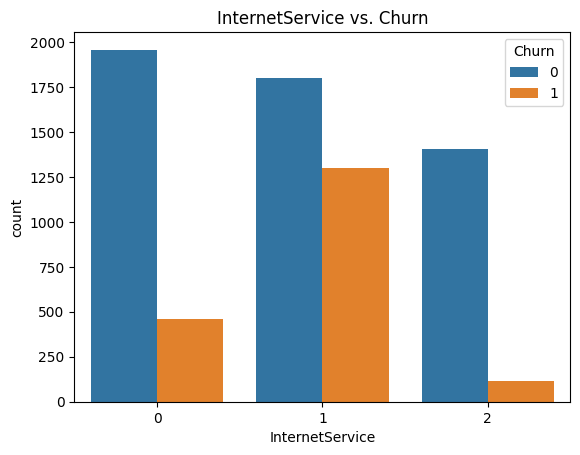

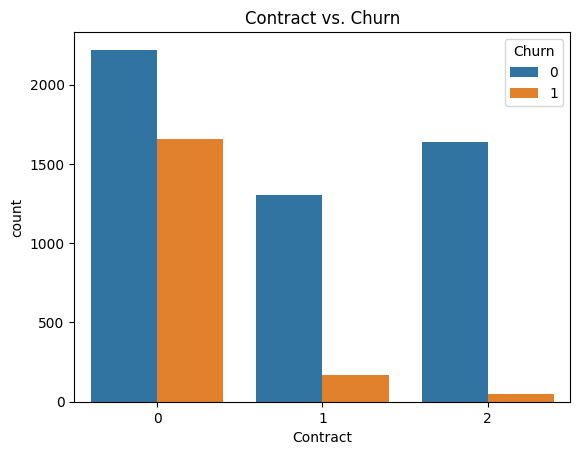

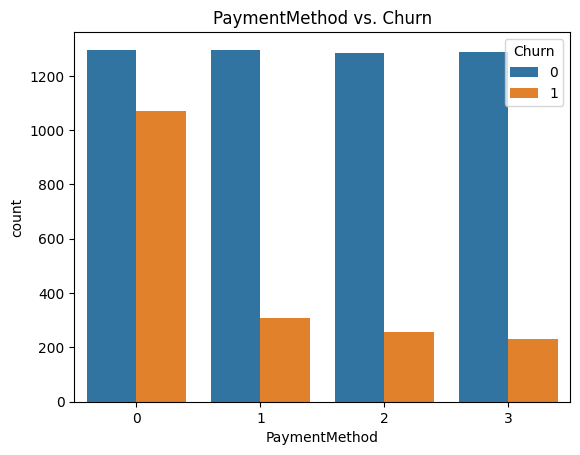

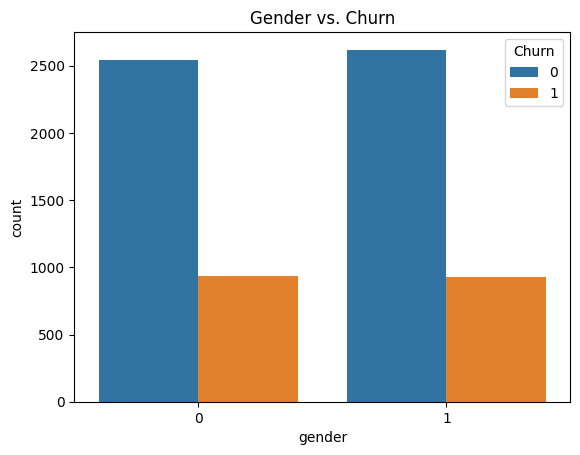

In [42]:
# Categorical features: InternetService, Contract, PaymentMethod, gender
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('InternetService vs. Churn')
plt.show()

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract vs. Churn')
plt.show()

sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('PaymentMethod vs. Churn')
plt.show()

sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender vs. Churn')
plt.show()


Stastical EDA

In [43]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value
print(f'Chi-square test p-value: {p}')

# Set a significance level (e.g., 0.05) and make a decision
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Gender is relevant to Churn.")
else:
    print("Fail to reject the null hypothesis. Gender may not be relevant to Churn.")


Chi-square test p-value: 0.4904884707065509
Fail to reject the null hypothesis. Gender may not be relevant to Churn.


Chi-square test p-value (InternetService): 5.831198962237274e-159
Reject the null hypothesis. InternetService is relevant to Churn.


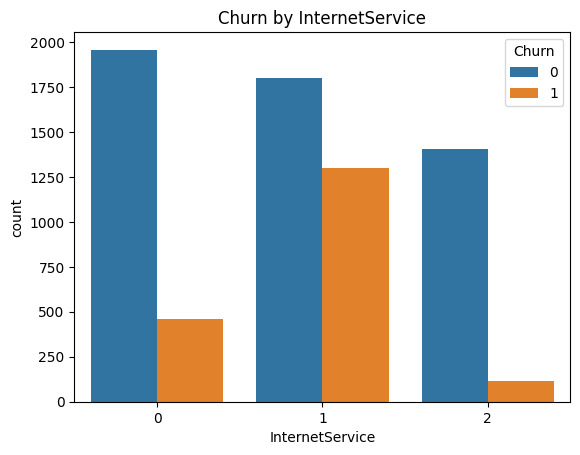

In [44]:
# Create a contingency table
contingency_table_internet = pd.crosstab(df['InternetService'], df['Churn'])

# Perform the chi-square test
chi2_internet, p_internet, _, _ = chi2_contingency(contingency_table_internet)

# Check the p-value
print(f'Chi-square test p-value (InternetService): {p_internet}')

# Decision based on the significance level
if p_internet < alpha:
    print("Reject the null hypothesis. InternetService is relevant to Churn.")
else:
    print("Fail to reject the null hypothesis. InternetService may not be relevant to Churn.")

# Stacked bar chart
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by InternetService')
plt.show()


Chi-square test p-value (Contract): 7.326182186265472e-257
Reject the null hypothesis. Contract is relevant to Churn.


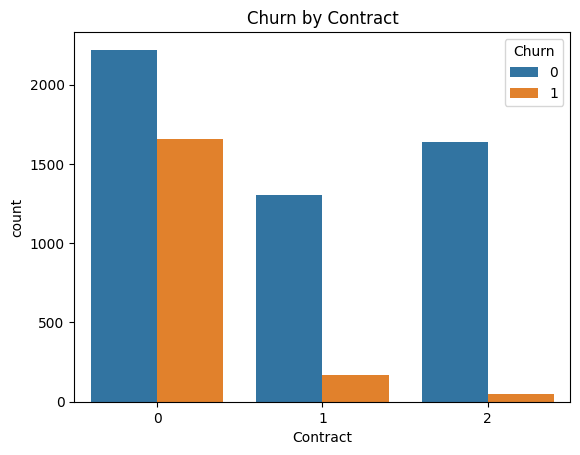

In [45]:
# Create a contingency table
contingency_table_contract = pd.crosstab(df['Contract'], df['Churn'])

# Perform the chi-square test
chi2_contract, p_contract, _, _ = chi2_contingency(contingency_table_contract)

# Check the p-value
print(f'Chi-square test p-value (Contract): {p_contract}')

# Decision based on the significance level
if p_contract < alpha:
    print("Reject the null hypothesis. Contract is relevant to Churn.")
else:
    print("Fail to reject the null hypothesis. Contract may not be relevant to Churn.")

# Stacked bar chart
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract')
plt.show()


Chi-square test p-value (PaymentMethod): 1.4263098511063342e-139
Reject the null hypothesis. PaymentMethod is relevant to Churn.


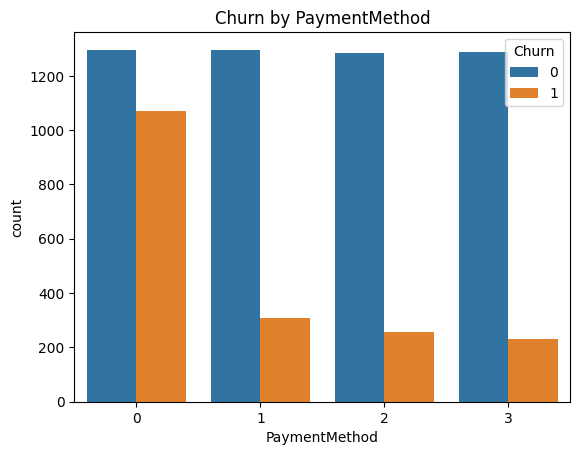

In [46]:
# Create a contingency table
contingency_table_payment = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Perform the chi-square test
chi2_payment, p_payment, _, _ = chi2_contingency(contingency_table_payment)

# Check the p-value
print(f'Chi-square test p-value (PaymentMethod): {p_payment}')

# Decision based on the significance level
if p_payment < alpha:
    print("Reject the null hypothesis. PaymentMethod is relevant to Churn.")
else:
    print("Fail to reject the null hypothesis. PaymentMethod may not be relevant to Churn.")

# Stacked bar chart
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by PaymentMethod')
plt.show()


Therefore, due to the further analysis from deducing the chi tests, gender will be dropped in addition.

In [47]:
# Drop the 'gender' column
df.drop('gender', axis=1, inplace=True)



In [48]:
df.head()

,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,29.85,29.85,0
1,34,0,1,1,56.95,1889.50,0
2,2,0,0,1,53.85,108.15,1
3,45,0,1,2,42.30,1840.75,0
4,2,1,0,0,70.70,151.65,1


**TRAINING**

In [49]:
!pip install scikeras

In [51]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target


In [55]:
# Ensuring X is a DataFrame
X = pd.DataFrame(X)

# Saving of column names
cols = X.columns

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Use saved column names here
X_scaled = pd.DataFrame(X, columns=cols)

with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)


In [56]:
# Split of the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)



In [68]:
# Function to create model using KerasClassifier
def create_model():
    #Input layer
    input_layer = Input(shape=(X_train.shape[1],))

    #Hidden layers
    hidden1 = Dense(32, activation='relu')(input_layer)
    dropout1 = Dropout(0.5)(hidden1)
    hidden2 = Dense(16, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(hidden2)

    #Output layer
    output_layer = Dense(1, activation='sigmoid')(dropout2)

    # Model Intialization
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'epochs': [10, 50, 100]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

**TESTING AND OPTIMIZATION**

In [70]:
# Train the model
model.fit(X_train, y_train)

# Evaluatation of model's accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# AUC score
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC score: {auc_score}")


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Model accuracy: 0.7071090047393365
AUC score: 0.8141436094987723


Re-testing

In [72]:
# Define the grid search parameters
param_grid = {
    'batch_size': [20, 40, 60, 80, 100, 120],
    'epochs': [20, 60, 120]
}

# New model intialization
model_gs = KerasClassifier(build_fn=create_model, verbose=0)

# Create GridSearchCV
grid = GridSearchCV(estimator=model_gs, param_grid=param_grid, n_jobs=1, cv=3)

# Fit the model to the training data
grid_result = grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [73]:
# Print the best parameters
print(f"Best parameters: {grid_result.best_params_}")

# Retrain the model with the optimized parameters
model_optimized = KerasClassifier(build_fn=create_model, verbose=0, **grid_result.best_params_)
model_optimized.fit(X_train, y_train)

# Test the model again
y_pred_optimized = model_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized model accuracy: {accuracy_optimized}")

y_pred_prob_optimized = model_optimized.predict_proba(X_test)[:, 1]
auc_score_optimized = roc_auc_score(y_test, y_pred_prob_optimized)
print(f"Optimized AUC score: {auc_score_optimized}")


Best parameters: {'batch_size': 40, 'epochs': 120}


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Optimized model accuracy: 0.7838862559241706
Optimized AUC score: 0.8439248809182957


As the optimized model demonstrates an increased AUC, it is the selected model for deployment.





In [85]:
# To display all the rows of testing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create a DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})

# Print the DataFrame
print(df)


      Actual  Predicted
6085       1          0
4729       0          0
6099       0          0
2714       0          0
5323       0          0
1025       0          0
3889       0          0
3153       0          0
2666       0          0
1714       0          0
5093       0          0
5997       0          1
2352       0          0
6236       0          0
4671       1          1
3870       0          0
6351       1          0
3746       1          1
1109       0          0
4764       1          1
5083       0          0
1190       0          0
148        0          0
6450       0          0
6339       1          0
5702       1          0
2018       1          0
1362       1          1
2815       1          1
5976       0          0
672        1          1
2959       0          1
4417       1          1
719        0          0
3587       1          1
2501       0          0
2162       0          0
4811       1          0
3143       0          0
2106       0          0
3766       1    

In [87]:
# Count the number of matches
matches = accuracy_score(y_test, y_pred_optimized, normalize=False)

# Get the total number of predictions
total = len(y_pred_optimized)

print(f"Number of matches: {matches} out of {total}")


Number of matches: 824 out of 1055


In [88]:
# Print the classification report
print(classification_report(y_test, y_pred_optimized))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_optimized))



              precision    recall  f1-score   support

           0       0.81      0.91      0.85       746
           1       0.68      0.48      0.56       309

    accuracy                           0.78      1055
   macro avg       0.74      0.69      0.71      1055
weighted avg       0.77      0.78      0.77      1055

[[677  69]
 [162 147]]


**Deployment**

In [89]:
model_optimized.model_.save("my_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
